In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


df = pd.read_csv("merged-data.csv")
df = df.dropna()
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [11]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  29322.000000  29322.000000  29322.000000  29322.000000  29322.000000   
mean      17.864491   1012.792722     77.536431      3.883755     25.538547   
std        7.444745      6.476409     14.684071      0.794366      4.162186   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       12.047000   1008.600000     67.699500      3.300000     23.054000   
50%       18.043000   1012.400000     80.019500      3.901500     25.141500   
75%       23.746000   1016.700000     89.225750      4.342075     28.524500   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  29322.000000  29322.000000  29322.000000  29322.000000  29322.000000   
mean    1080.592552    546.576899    132.940438     12.023358      2.574660   
std       17.776378      6.357840     15.414675      1.070531      2.313091   
min     1002.900000    511.040000    100.020000      9.851800      0.001640   
25%     1070.125000    545.680000    123.370000     11.389000      1.324025   
50%     1084.950000    549.880000    133.630000     11.954000      1.829500   
75%     1095.500000    550.050000    141.665000     12.615000      3.165000   
max     1100.900000    550.600000    179.500000     15.159000     44.103000   

                NOX  
count  29322.000000  
mean      64.716220  
std       11.847466  
min       25.905000  
25%       56.380250  
50%       63.359000  
75%       70.802000  
max      119.910000

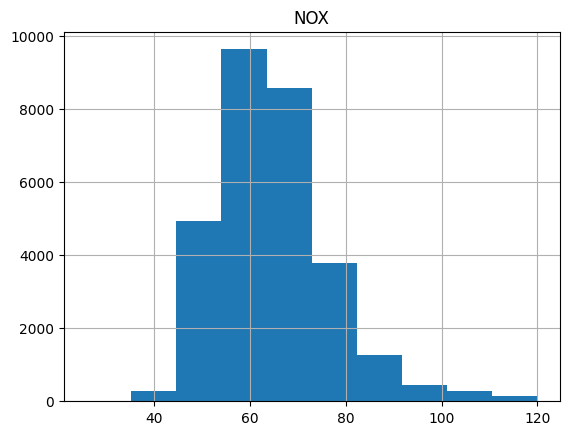

In [150]:
dataHist = [ 'NOX']
cdf = df[dataHist]
viz = cdf[dataHist]
viz.hist()
plt.show()

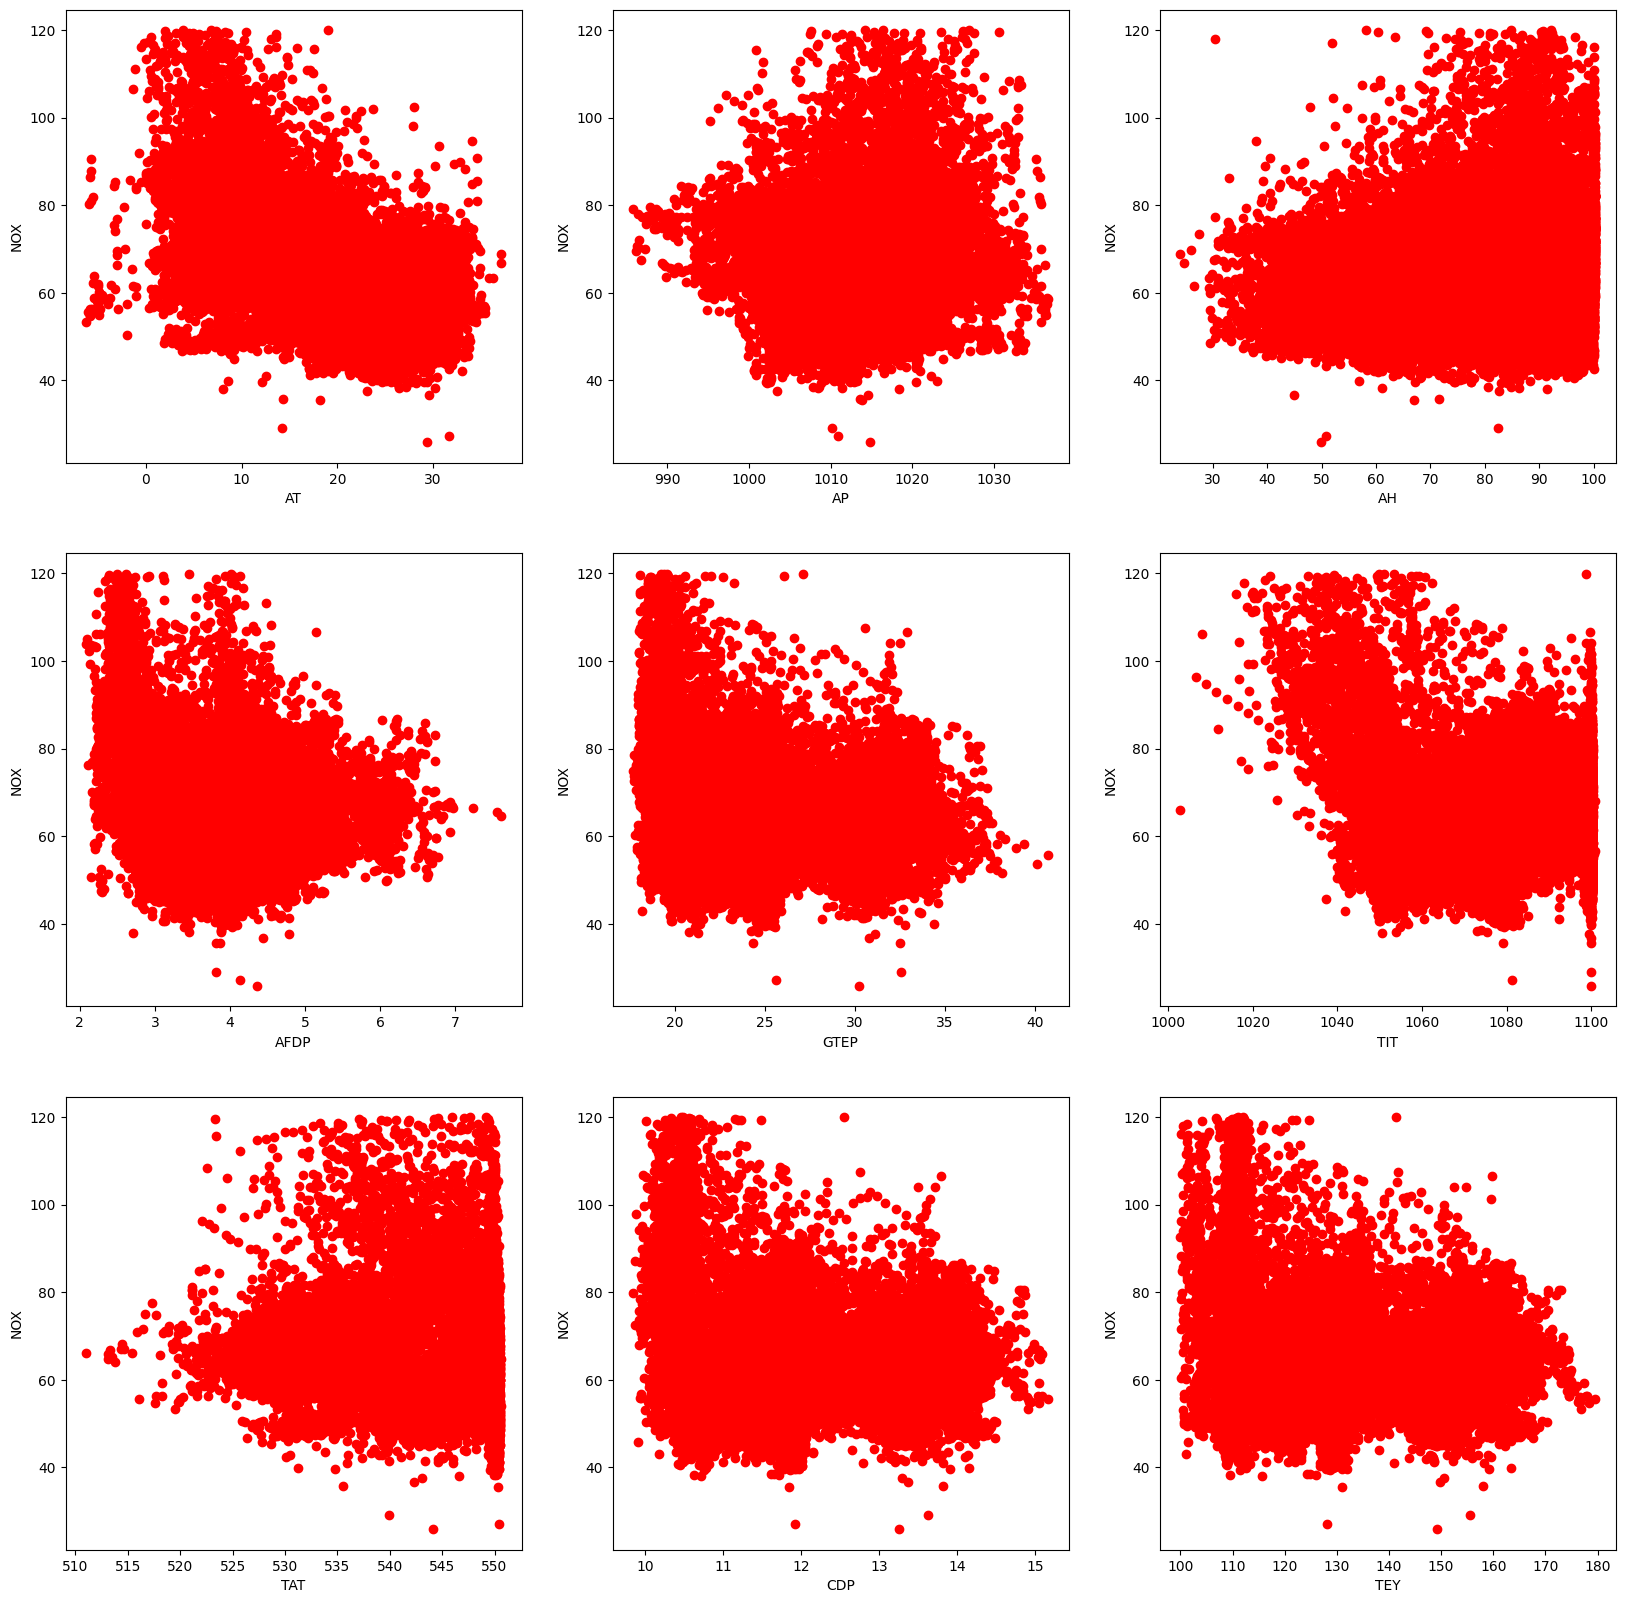

In [151]:
colNames = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']
indx = 0

msk = np.random.rand(len(df)) < 0
train = df[msk]
test = df[~msk]
plt.figure(figsize=(20, 20))

while indx < 9:
    indDataName = colNames[indx]
    depData = test.NOX



    plt.subplot(3, 3, indx+1)
    plt.scatter(test[indDataName], depData, color = 'red')
    plt.xlabel(indDataName)
    plt.ylabel('NOX')
    # plt.show()
    indx += 1


plt.show()

# Split Data Into Train & Test

In [162]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

# Linear CO-TIT

0.5430676779810386


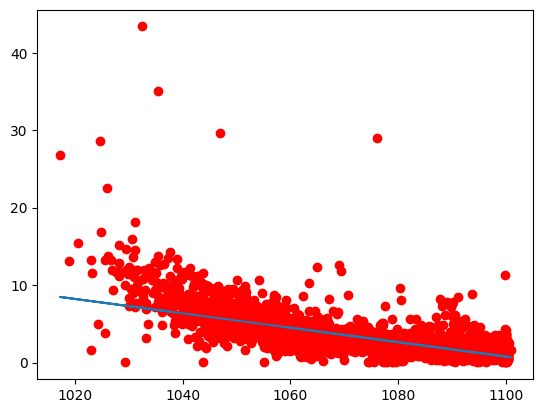

In [176]:
#single variable with TIT
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['TIT']])
y = np.asanyarray(train[['CO']])
regr.fit(x, y)

x = np.asanyarray(test[['TIT']])
y = np.asanyarray(test[['CO']])

print(regr.score(x,y))

plt.plot(x, regr.predict(x))
plt.scatter(x, y, color='red')
plt.show()

# Linear Multivariable

0.49304575986322374


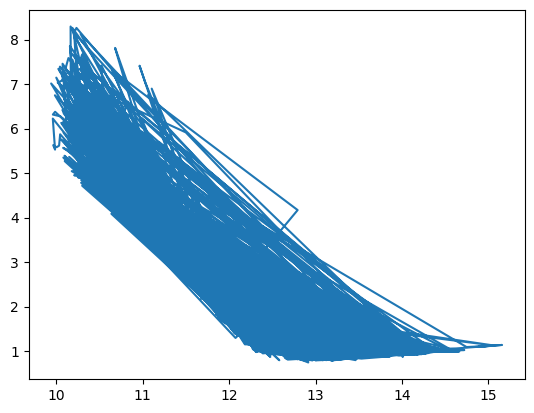

In [202]:
#Multivariable
from sklearn import linear_model
regr = linear_model.Lasso()
x = np.asanyarray(train[['TEY', 'CDP','AFDP', 'GTEP', 'TIT']])
y = np.asanyarray(train[['CO']])
regr.fit(x, y)

x = np.asanyarray(test[['TEY', 'CDP','AFDP', 'GTEP', 'TIT']])
y = np.asanyarray(test[['CO']])

print(regr.score(x,y))
plt.plot(test[['CDP']], regr.predict(x))
plt.show()

# Exponinitial & Inverse

[4.389, 3.695, 2.834, 5.848, 3.723, 3.487]


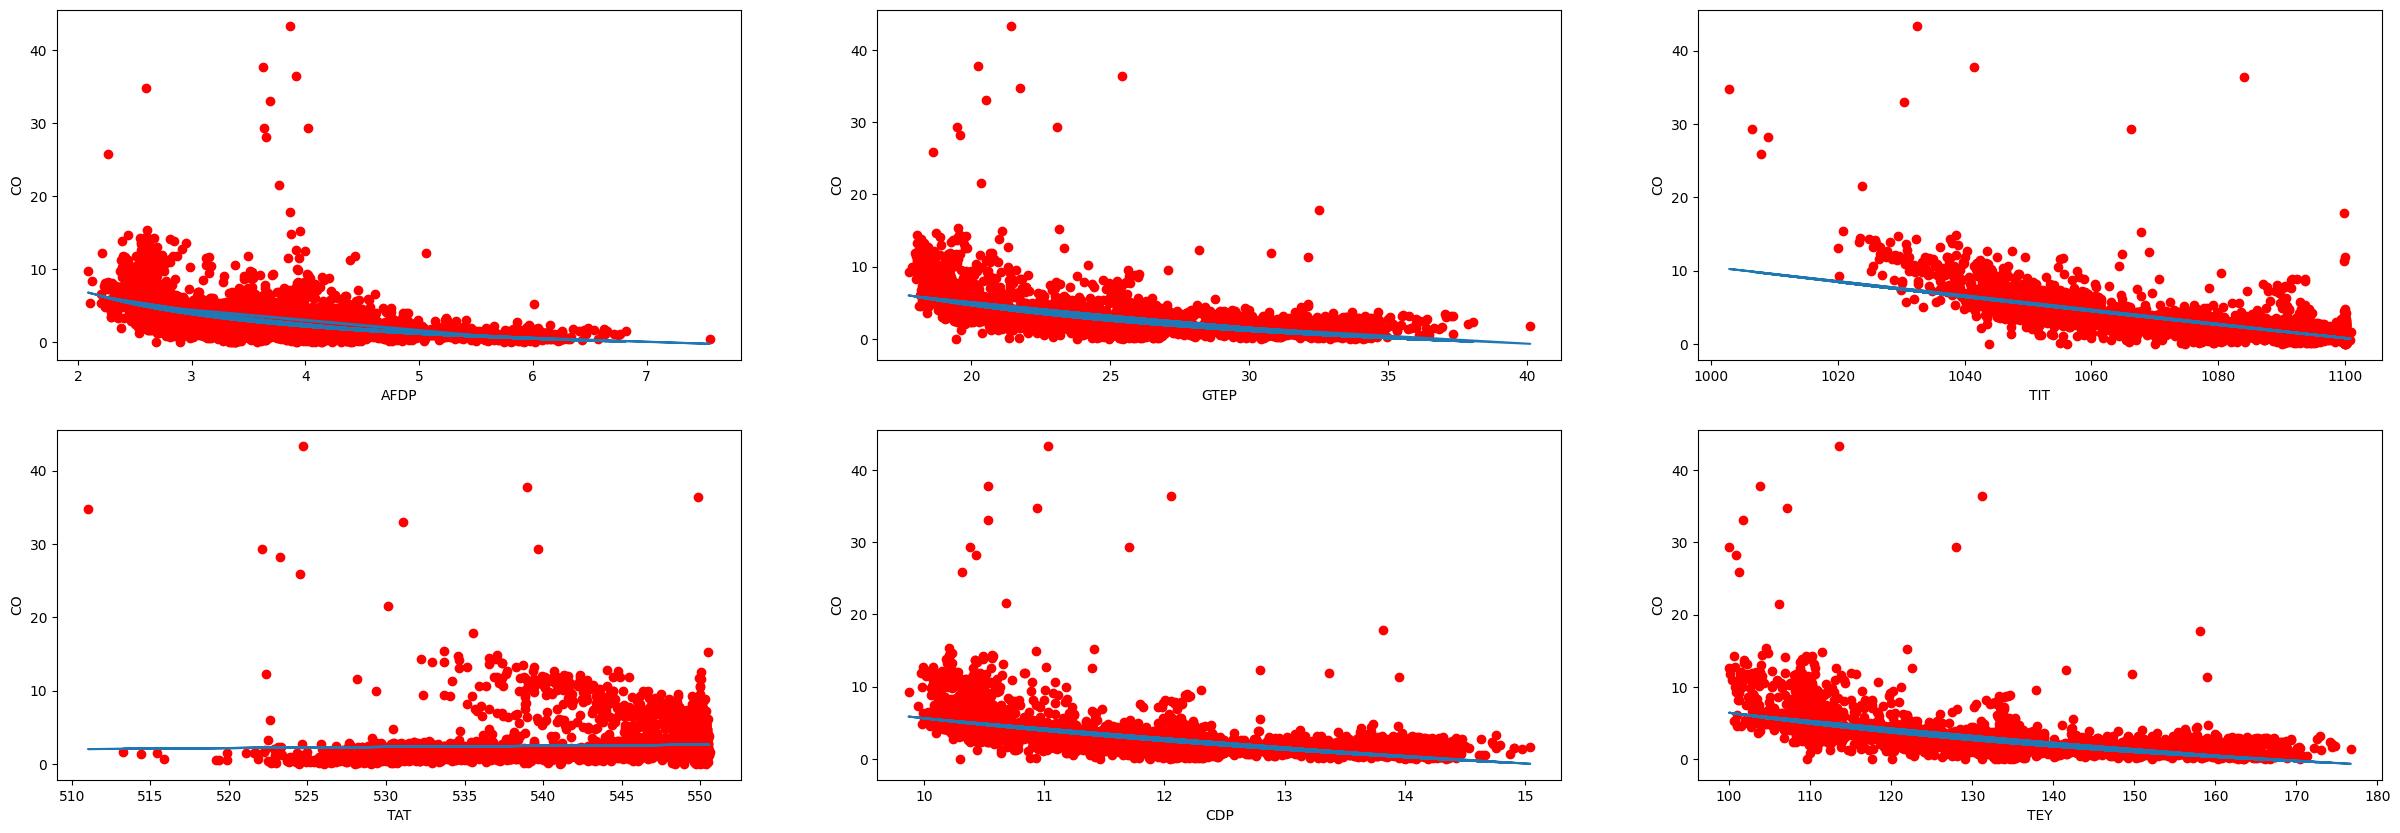

In [169]:
from sklearn import linear_model
from sklearn.metrics import r2_score

indeVars = ['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']
testResults = []
regr = linear_model.LinearRegression()
def func(y):
    return 1/y

plt.figure(figsize=(30, 10))

for var in indeVars:
    x = np.asanyarray(train[[var]])
    y = np.asanyarray(train[['CO']])
    logY = func(x)

    regr.fit(logY, y)

    x = np.asanyarray(test[[var]])
    y = np.asanyarray(test[['CO']])
    logY = func(x)

    testResults.append(round(r2_score(y, regr.predict(logY)), 3))

    plt.subplot(2, 3, indeVars.index(var) + 1)
    plt.plot(x, regr.predict(logY))
    plt.scatter(x, y, color='red')
    plt.xlabel(var)
    plt.ylabel('CO')

print(testResults)
plt.show()

# Multivariable Exponential

In [22]:
from sklearn import linear_model
from sklearn.metrics import r2_score

var = ['AFDP', 'GTEP', 'TIT', 'CDP', 'TEY']
regr = linear_model.LinearRegression()
def func(y):
    return np.log(y)


x = np.asanyarray(train[var])
y = np.asanyarray(train[['CO']])
logY = func(y)

regr.fit(x, logY)

x = np.asanyarray(test[var])
y = np.asanyarray(test[['CO']])
logY = func(y)

print(round(r2_score(logY, regr.predict(x)), 3))

0.539


# Polynomial

[0.315, 0.026, 0.058, 0.178, 0.054, 0.16, 0.038, 0.022]


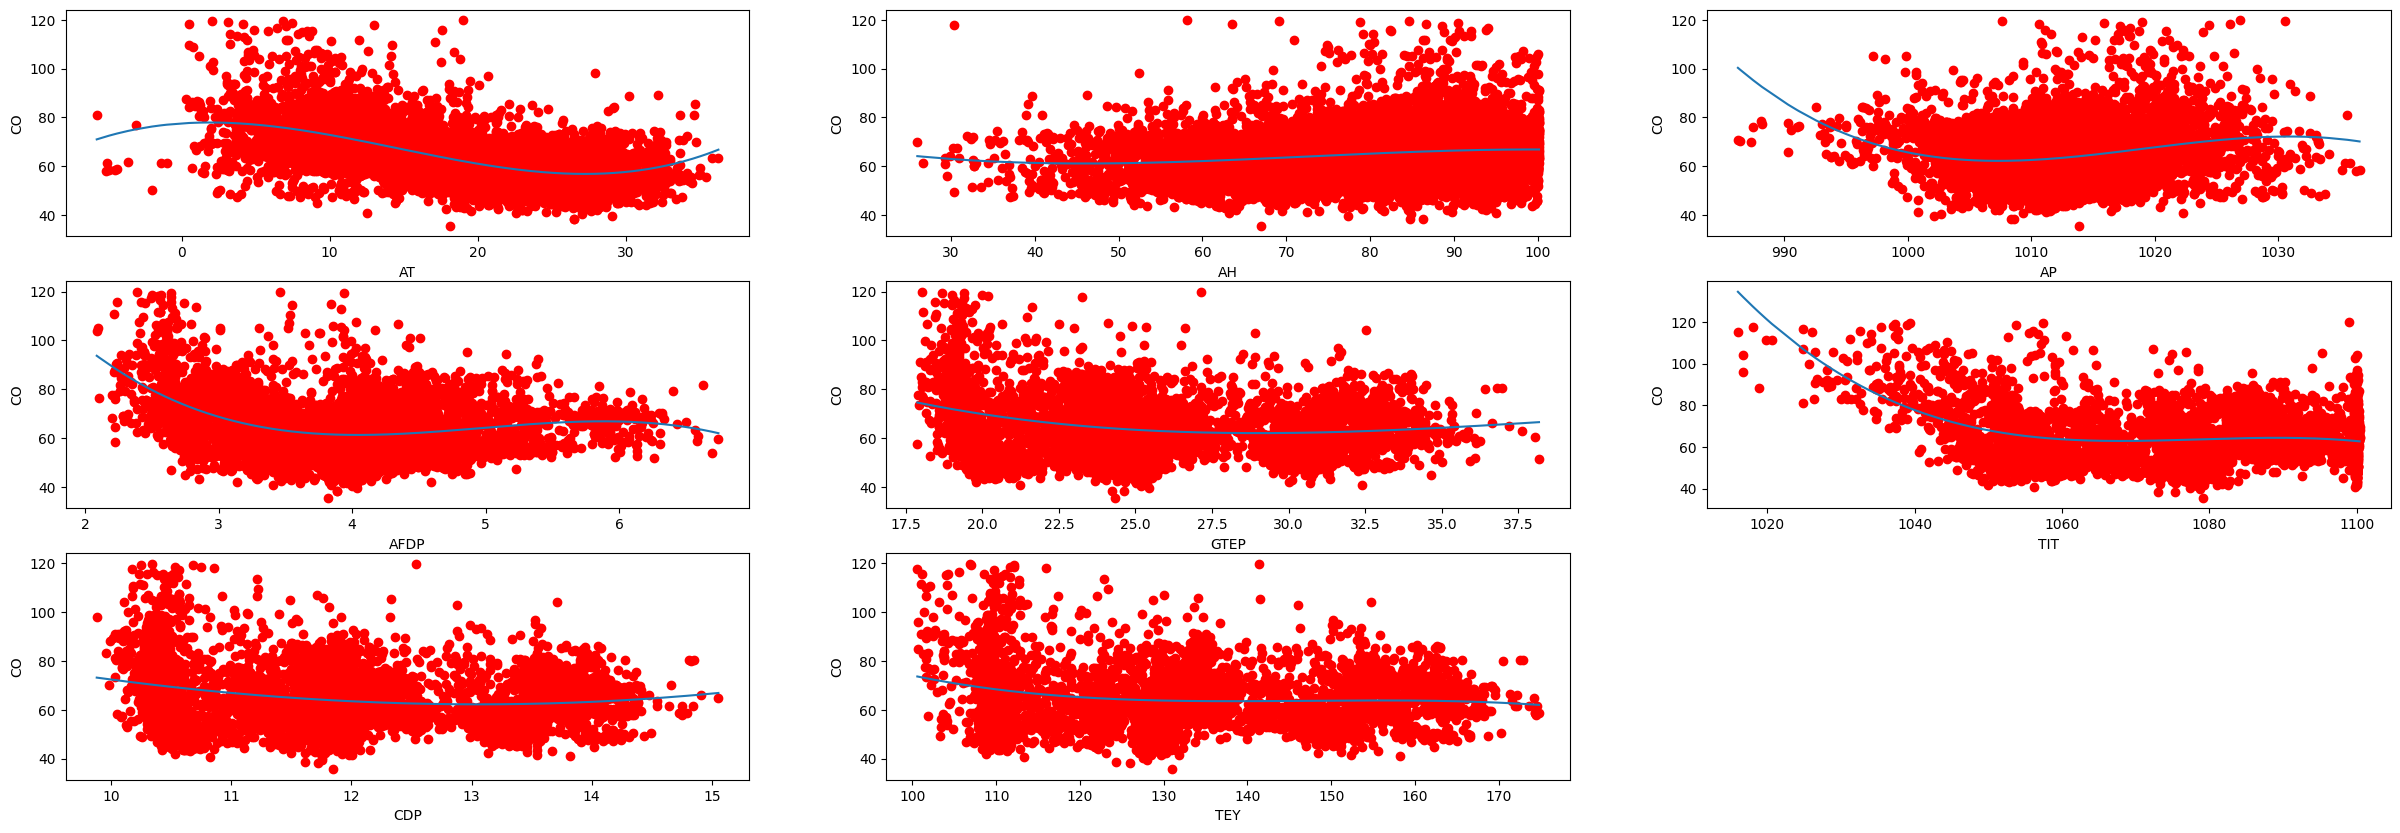

In [128]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

indeVars = ['AFDP', 'GTEP', 'TIT', 'CDP', 'TEY']
testResults = []
degree = 3

plt.figure(figsize=(30, 10))

for Data in indeVars:
    x = np.asanyarray(train[[Data]])
    y = np.asanyarray(train[['CO']])


    poly = PolynomialFeatures(degree=degree, include_bias=False)
    polyX = poly.fit_transform(x.reshape(-1, 1))

    regr = linear_model.LinearRegression()
    regr.fit(polyX, y)

    x = np.asanyarray(test[[Data]])
    y = np.asanyarray(test[['CO']])
    sortedX = np.sort(x, axis=0)


    polyX = poly.fit_transform(x)
    sortedPoly = poly.fit_transform(sortedX)

    testResults.append(round(r2_score(y, regr.predict(polyX)), 3))

    plt.subplot(2, 3, indeVars.index(Data) + 1)
    plt.plot(sortedX, regr.predict(sortedPoly))
    plt.scatter(x, y, color='red')
    plt.xlabel(Data)
    plt.ylabel('CO')

print(testResults)
plt.show()

# Multivariable Polynomial

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

indeVars = ['AFDP', 'GTEP', 'TIT', 'CDP']
degree = 3

x = np.asanyarray(train[indeVars])
y = np.asanyarray(train[['CO']])

poly = PolynomialFeatures(degree=degree, include_bias=False)
polyX = poly.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(polyX, y)

x = np.asanyarray(test[indeVars])
y = np.asanyarray(test[['CO']])

polyX = poly.fit_transform(x)

print(round(r2_score(y, regr.predict(polyX)), 3))

0.645


# Neural Network CO

In [171]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from time import time

start = time()
model = tf.keras.Sequential([
    Input(shape=(3,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

X_train = np.array(train[['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP']])
Y_train = np.array(train[['CO']])
X_test = np.array(test[['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP']])
Y_test = np.array(test[['CO']])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=20000, batch_size=300)

test_loss = model.evaluate(X_test,  Y_test)
end =time()

print(end-start)
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 304.0234
Epoch 2/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139.1923
Epoch 3/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.4605
Epoch 4/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.6232
Epoch 5/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.0110
Epoch 6/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.0121
Epoch 7/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.1136
Epoch 8/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.7752
Epoch 9/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.2102
Epoch 10/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.6080
Epoch 11/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.6063
Epoch 12/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.5051
Epoch 13/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.3713
Epoch 14/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105.1243
Epoch 15/20000


KeyboardInterrupt: 

In [170]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, model.predict(X_test)))

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step
0.6491057965696161


# Desicion Tree

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

colNames = ['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']
testResults = []

for Data in colNames:
    trainX = train[[Data]]
    trainY = train[['CO']]
    testX = test[[Data]]
    testY = test[['CO']]

    regr = DecisionTreeRegressor(random_state = 0)
    regr.fit(trainX, trainY)

    testNum = r2_score(testY, regr.predict(testX))
    testResults.append(round(testNum, 3))

print(testResults)

[-0.418, -0.353, 0.219, -0.142, -0.109, -0.103]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

colNames = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'TEY']
testResults = []


for Data in colNames:
    trainX = train[[Data]]
    trainY = train[['CO']]
    testX = test[[Data]]
    testY = test[['CO']]

    label_encoder = LabelEncoder()
    x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
    x_numerical = df.select_dtypes(exclude=['object']).values
    x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

    regr = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
    regr.fit(trainX, trainY)

    testNum = r2_score(testY, regr.predict(testX))

    if(data[0] < testNum):
        data[0] = testNum
        data[1] = Data

print(data)

# Neural Network NOX

In [172]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from time import time

start = time()
model = tf.keras.Sequential([
    Input(shape=(3,)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

X_train = np.array(train[['TIT', 'AFDP', 'AT']])
Y_train = np.array(train[['NOX']])
X_test = np.array(test[['TIT', 'AFDP', 'AT']])
Y_test = np.array(test[['NOX']])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=9000, batch_size=300)

test_loss = model.evaluate(X_test,  Y_test)
end =time()

print(end-start)
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 290.5667
Epoch 2/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.5175
Epoch 3/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.5098
Epoch 4/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.9049
Epoch 5/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121.6715
Epoch 6/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.0790
Epoch 7/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.0320
Epoch 8/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.6966
Epoch 9/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.2882
Epoch 10/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.9862
Epoch 11/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 106.4566
Epoch 12/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107.9488
Epoch 13/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.6313
Epoch 14/20000
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105.0016
Epoch 15/20000


In [174]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, model.predict(X_test)))

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
0.6595556506730376
